In [6]:
!python --version

Python 2.7.13


# Importation du dataset

Le dataset faisant parmi des datasets fournis par Scikit Learn, on l'importe d'ici pour gagner du temps.

In [8]:
from sklearn import datasets

dataset = datasets.load_digits()

In [10]:
X = dataset.data
y = dataset.target

In [11]:
print(dataset["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

# Extraits du dataset

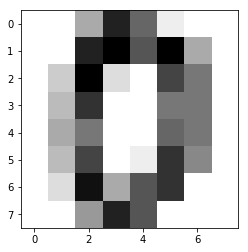

In [94]:
import matplotlib.pyplot as plt

# Exemple montrant l'image 0 du dataset
plt.imshow(dataset.images[0], cmap=plt.cm.gray_r)
plt.show()

# Séparation des jeux, standardisation et SVC

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33)
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

In [18]:
algorithme = svm.SVC(kernel="linear")
algorithme.get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
model_selection.cross_val_score(algorithme, x, y, n_jobs=-1, cv=5)

array([0.96428571, 0.92265193, 0.96657382, 0.96358543, 0.92957746])

# Grid Search

In [170]:
params = {  
    'gamma' : [0.01, 0.1, 0.5],
    'probability' : [True]
}
grid = model_selection.GridSearchCV(algorithme, params, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_.score(X_test, y_test))
print(grid.best_params_)

0.9842061512884456 0.9713804713804713
{'gamma': 0.01, 'probability': True}


## Tests avec différents paramètres

In [171]:
params = {  
    'C': [0.5, 1, 1.5],
    'gamma' : [0.5, 0.1, 0.15],
    'probability' : [True]
}
grid = model_selection.GridSearchCV(algorithme, params, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_.score(X_test, y_test))
print(grid.best_params_)

0.9842061512884456 0.9713804713804713
{'C': 0.5, 'gamma': 0.5, 'probability': True}


In [22]:
params = {  
    'C': [1.5, 2, 2.5],
    'gamma' : [0.05, 0.1, 0.015],
    'kernel': ['rbf', 'poly']
}
grid = model_selection.GridSearchCV(algorithme, params, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_.score(X_test, y_test))
print(grid.best_params_)

0.9808811305070657 0.9814814814814815
SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.015, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [172]:
params = {  
    'C': [4.5, 5, 5.5],
    'gamma' : [0.25, 0.5, 0.65],
    'kernel': ['rbf', 'sigmoid'],
    'degree' : [1,3,5],
    'probability' : [True]
}
grid = model_selection.GridSearchCV(algorithme, params, n_jobs=-1, cv=5)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_.score(X_test, y_test))
print(grid.best_params_)

0.11055694098088113 0.10101010101010101
{'C': 4.5, 'degree': 1, 'gamma': 0.25, 'kernel': 'rbf', 'probability': True}


# Test avec tous les algorithmes

In [24]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print(sklearn)
    for nom_module in dir(sklearn):    
        if verbose : print(nom_module)
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print(" nom algorithme  = ", nom_fonction)
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print(e)
        if verbose: print("="*30)
    return algos

In [25]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print("\n===>",key)
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print(",".join(algos_))


===> feature_extraction
DictVectorizer,FeatureHasher

===> feature_selection
GenericUnivariateSelect,RFE,RFECV,SelectFdr,SelectFpr,SelectFromModel,SelectFwe,SelectKBest,SelectPercentile,VarianceThreshold

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,HuberRegressor,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,RANSACRegressor,RandomizedLasso,RandomizedLogisticRegression,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor

===> model_selection
GridSearchCV,RandomizedSearchCV

===> neighbors
KNeighborsClassifier,KNeighborsRegressor,KernelDensity,LSHForest,LocalOutlierFactor,NearestCentroid,NearestNeighbors,RadiusNeighborsClassifier,RadiusNeighborsRegressor

===> 

In [26]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [65]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print (name)
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print (performance)
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print ("Algo de classification")
        else                : print (str(e)[:50])
    print ("="*30)

Transforms lists of featu
'numpy.ndarray' object has no attribute 'items'
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Univariate feature select
'GenericUnivariateSelect' object has no attribute 
__init__() missing 1 required positional argument:
__init__() missing 1 required positional argument:
Filter
'SelectFdr' object has no attribute 'score'
Filter
'SelectFpr' object has no attribute 'score'
__init__() missing 1 required positional argument:
Filter
'SelectFwe' object has no attribute 'score'
Select features according
'SelectKBest' object has no attribute 'score'
Select features according
'SelectPercentile' object has no attribute 'score'
Feature selector that rem
'VarianceThreshold' object has no attribute 'score
Bayesian ARD regression.


/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 0 32 39] are constant.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.6/dist-p

0.5328437597218634
Bayesian ridge regression
0.5341222281890428
Linear regression with co
0.18713529927259753
Elastic Net model with it
0.533031967604153
Linear regression model t
0.5264650940470894
Least Angle Regression mo
0.5197678839187956
Cross-validated Least Ang


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.49596074199261647
Linear Model trained with
0.02920132204621706
Lasso linear model with i
0.5330649314654667
Lasso model fit with Leas
-0.0005994771345609884
Cross-validated Lasso, us
0.5314317575339297
Lasso model fit with Lars
0.532443720184389
Ordinary least squar


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.532717265184165
Logistic Regression (aka
0.9511784511784511
Logistic Regression CV (a


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_m

0.9595959595959596
Multi-task ElasticNet mod
For mono-task outputs, use ElasticNet
Multi-task L1/L2 ElasticN
For mono-task outputs, use ElasticNetCV
Multi-task Lasso model tr
For mono-task outputs, use ElasticNet
Multi-task L1/L2 Lasso wi
For mono-task outputs, use LassoCV
Orthogonal Matching Pursu
0.3776628579564806
Cross-validated Orthogona
0.3776628579564806
Passive Aggressive Classi
0.9242424242424242
Passive Aggressive Regres
0.23640597331021448
Perceptron

    Read more
0.9208754208754208
RANSAC (RANdom SAmple Con


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_

-1.7422195274469137e+20
Randomized Lasso.

    Ra
'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
'RandomizedLogisticRegression' object has no attri
Linear least squares with
0.5330314386781743
Ridge regression with bui
0.5338118766216833
Classifier using Ridge re
0.9175084175084175
Ridge classifier with bui
0.9175084175084175
Linear classifiers (SVM,
0.9478114478114478
Linear model fitted by mi
0.5116782087932736
Theil-Sen Estimator


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.49992218686407847
__init__() missing 2 required positional arguments
__init__() missing 2 required positional arguments
Classifier implementing t
0.9696969696969697
Regression based on k-nea
0.9345569265283231
Kernel Density Estimation
-43685.54871901052
Performs approximate near
'LSHForest' object has no attribute 'score'
Unsupervised Outlier Dete
'LocalOutlierFactor' object has no attribute 'scor
Nearest centroid classifi
0.8922558922558923
Unsupervised learner for
'NearestNeighbors' object has no attribute 'score'
Classifier implementing a


/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


Algo de classification
Regression based on neigh
-2.467750981491868
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Imputation transformer fo
'Imputer' object has no attribute 'score'
Bin continuous data into
'KBinsDiscretizer' object has no attribute 'score'
Center a kernel matrix
'KernelCenterer' object has no attribute 'score'
Binarize labels in a one-
fit() takes 2 positional arguments but 3 were give
Encode labels with value
fit() takes 2 positional arguments but 3 were give
Scale each feature by its
'MaxAbsScaler' object has no attribute 'score'
Transforms features by sc
'MinMaxScaler' object has no attribute 'score'
Transform between iterabl
fit() takes 2 positional arguments but 3 were give
Normalize samples individ
'Normalizer' object has no attribute 'score'
Encode categorical intege
X needs to contain only non-negative integers.
Encode categorical featur
'OrdinalEncoder' object 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:161: UserWarning: Feature 0 is constant and will be replaced with 0.
  "replaced with 0." % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:161: UserWarning: Feature 32 is constant and will be replaced with 0.
  "replaced with 0." % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_discretization.py:161: UserWarning: Feature 39 is constant and will be replaced with 0.
  "replaced with 0." % jj)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future t

'PowerTransformer' object has no attribute 'score'
Transform features using
'QuantileTransformer' object has no attribute 'sco
Scale features using stat
'RobustScaler' object has no attribute 'score'
Standardize features by r
'StandardScaler' object has no attribute 'score'
Can't instantiate abstract class BaseRandomProject
Reduce dimensionality thr
eps=0.100000 and n_samples=1203 lead to a target d
Reduce dimensionality thr
eps=0.100000 and n_samples=1203 lead to a target d
Linear Support Vector Cla


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9444444444444444
Linear Support Vector Reg
0.5152943380452932
Nu-Support Vector Classif
0.9562289562289562
Nu Support Vector Regress
0.8374894050386315
Unsupervised Outlier Dete


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
0.9764309764309764
Epsilon-Support Vector Re


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8427532782799633
'module' object is not callable


In [70]:
performances

{'Bayesian ARD regression.': [0.5328437597218634],
 'Bayesian ridge regression': [0.5341222281890428],
 'Linear regression with co': [0.18713529927259753],
 'Elastic Net model with it': [0.533031967604153],
 'Linear regression model t': [0.5264650940470894],
 'Least Angle Regression mo': [0.5197678839187956],
 'Cross-validated Least Ang': [0.49596074199261647],
 'Linear Model trained with': [0.02920132204621706],
 'Lasso linear model with i': [0.5330649314654667],
 'Cross-validated Lasso, us': [0.5314317575339297],
 'Lasso model fit with Lars': [0.532443720184389],
 'Ordinary least squar': [0.532717265184165],
 'Logistic Regression (aka': [0.9511784511784511],
 'Logistic Regression CV (a': [0.9595959595959596],
 'Orthogonal Matching Pursu': [0.3776628579564806],
 'Cross-validated Orthogona': [0.3776628579564806],
 'Passive Aggressive Classi': [0.9242424242424242],
 'Passive Aggressive Regres': [0.23640597331021448],
 'Perceptron\n\n    Read more': [0.9208754208754208],
 'Linear least s

# Graphiques avec Pandas

## Performances et Gains de chaque algorithmes

In [250]:

import pandas as pd
df = pd.DataFrame(performances).T

df.columns = ["performance"]
df = df.sort_values("performance")

liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains
df

,performance,gains
Linear Model trained with,0.029201,0.00
Linear regression with co,0.187135,540.85
Passive Aggressive Regres,0.236406,26.33
Cross-validated Orthogona,0.377663,59.75
Orthogonal Matching Pursu,0.377663,0.00
Cross-validated Least Ang,0.495961,31.32
Theil-Sen Estimator,0.499922,0.80
Linear model fitted by mi,0.511678,2.35
Linear Support Vector Reg,0.515294,0.71
Least Angle Regression mo,0.519768,0.87


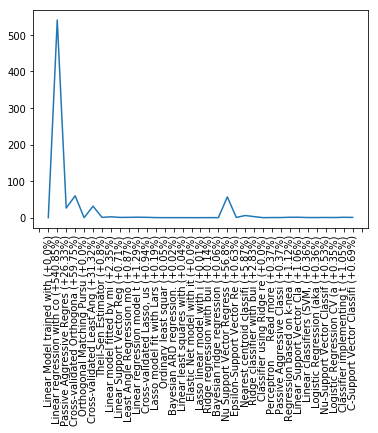

In [251]:
import matplotlib.pyplot as plt
fig , axes = plt.subplots(1,1)
new_labels = []
for i, index in enumerate(df.index):
    new_label = "{} (+{}%)".format(index,df.gains[i])
    new_labels.append(new_label.replace("\n", " "))
plt.plot(new_labels, df.gains)
plt.xticks(range(len(new_labels)), rotation=90)
axes.xaxis.labelpad = 20
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [232]:
df = df.drop("gains", axis=1)

## Graphique des performances

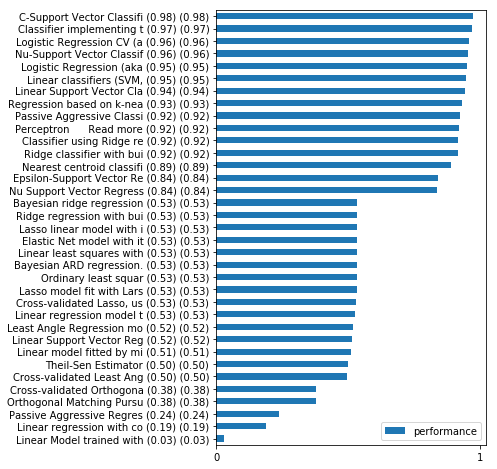

In [233]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values("performance").plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass

**Résultat**: C-Support Vector Classification (SVC) semble être le meilleur algorithme côté performance

## Courbe ROC

In [146]:
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


# On binarise Y car un ROC se fait uniquement sur deux classes
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

n_classes = y.shape[1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33)
scaler = StandardScaler()
scaler.fit(X_train)                 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

# Pour classifier, on en compare un face aux autres (Exemple: c'est un "1" ou pas, puis c'est un "2" ou pas, etc..)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

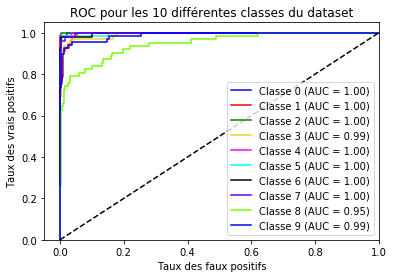

In [145]:
from sklearn import metrics
fpr = dict()
tpr = dict()
roc_auc = dict()
# L'idée ici est de superposer chaque ROC dans le même plot
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', '#F4D423', 'magenta', 'cyan', 'black', '#5A00FF', "#72FF00"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='Classe {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux des faux positifs')
plt.ylabel('Taux des vrais positifs')
plt.title('ROC pour les 10 différentes classes du dataset')
plt.legend(loc="lower right")
plt.show()

**Résultat**: On se rend compte que la plupart du temps la classification est correcte, mais quelques difficulté à classer les 8, certainement parce que ça peut se confondre avec un zéro.

# Optimisation des hyperparamètres

In [175]:
n_samples = len(dataset.images)
# On applatit l'image pour qu'elle rentre dans un tableau
X = dataset.images.reshape((n_samples, -1))
y = dataset.target
# Du coup on refait le split
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.33)

In [179]:
from sklearn.metrics import classification_report

{
    'kernel': ['linear', 'rbf'],
    'C': [1, 2, 3, 4, 5],
    'gamma': [1, 0.1, 0.01, 0.001],
    'probability': [True]
}

clf = model_selection.GridSearchCV(svm.SVC(C=1), parametres_proposes, cv=5)
clf.fit(X_train, y_train)

clf.best_params_

{'C': 3, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}